In [5]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/")
import bootstrap
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid

In [6]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [7]:
from scipy.optimize import curve_fit
from copy import copy, deepcopy
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

def int_to_pauli(i,n):
    p = np.base_repr(i,base=4)
    p = '0'*(n-len(p)) + p
    p = p.replace('0','I').replace('1', 'X').replace('2', 'Y').replace('3', 'Z')
    return p

def commute(p,q):
    c = 1
    n = len(p)
    for i in range(n):
        if p[i] != 'I' and q[i] != 'I':
            if p[i] != q[i]:
                c *= -1
    return c

def fidelity_to_error(pauli_fidelity,n):
    N = 4**n
    pauli_error = {}
    for i in range(N):
        p = int_to_pauli(i,n)
        pauli_error[p] = 0
        for j in range(N):
            q = int_to_pauli(j,n)
            pauli_error[p] += pauli_fidelity[q] * commute(p,q) / N
    return pauli_error
    

In [8]:
import random   
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)



In [9]:
# filename = str(uuid.uuid4())
# filename+="XX23541_noSE_explicitCNOT_XX_R_0711_01+10_ExperimentalData"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0119 true identity/results/ef462701-e29a-483d-826d-554fe27ceaf123541_FTXX_trueidentity_01192024_01+10_ExperimentalData", "rb") as fp:
    eab_load_cpy=pickle.load(fp)

In [10]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
shots=2000
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01_identitytest(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

print (eab_result)


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.935, 0.913, 0.942, 0.86, 0.893, 0.932, 0.91, 0.893, 0.885, 0.913, 0.929, 0.918, 0.904, 0.915, 0.916, 0.908, 0.892, 0.93, 0.922, 0.911], 4: [0.924, 0.907, 0.895, 0.919, 0.877, 0.923, 0.833, 0.904, 0.913, 0.894, 0.793, 0.92, 0.893, 0.815, 0.878, 0.91, 0.906, 0.897, 0.913, 0.911], 8: [0.908, 0.873, 0.922, 0.867, 0.886, 0.885, 0.904, 0.805, 0.868, 0.892, 0.875, 0.877, 0.895, 0.904, 0.9, 0.931, 0.887, 0.904, 0.905, 0.88], 16: [0.858, 

Data analysis: no bootstrapping, different depth

Analyze full set of data without bootstrapping

Parameters: n = 2, C = 20,  L =  [2, 4, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.0030998963551225334
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0022548 0.000299
YI 0.0019637 0.0003148
ZI 0.0027448 0.0003714
IX 0.0025341 0.0006926
XX 0.0043695 0.0006773
YX 0.0041719 0.0006925
ZX 0.0050051 0.0007736
IY 0.0017147 0.0005771
XY 0.0036227 0.0006018
YY 0.0033632 0.0006064
ZY 0.0043459 0.0007216
IZ 0.0016074 0.0003071
XZ 0.0038411 0.0004086
YZ 0.0037311 0.0004214
ZZ 0.0043282 0.0004333


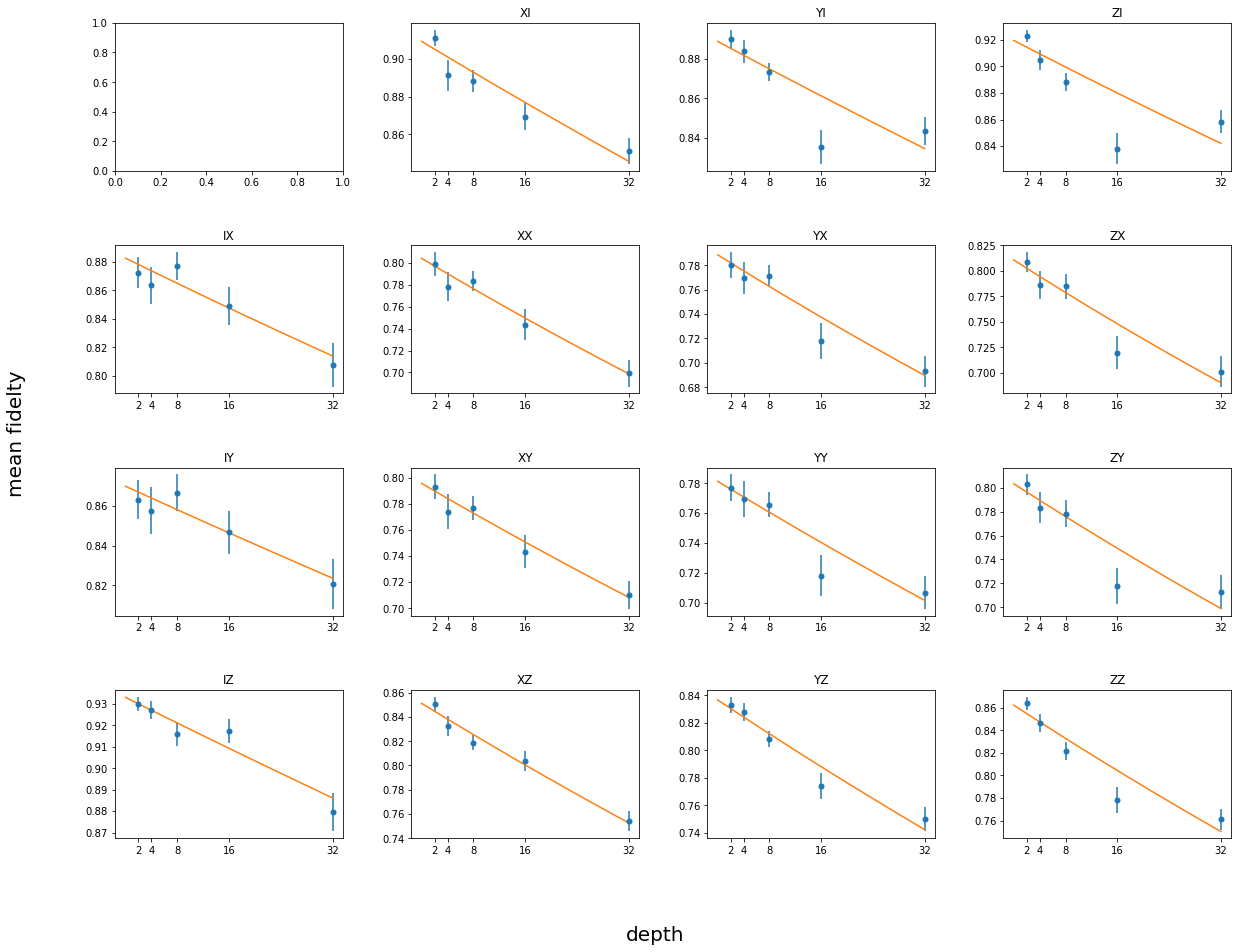

In [7]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [9]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9969001
XI 0.0006069
YI 0.0007141
ZI 0.0003149
IX 0.0002194
XX -1.6e-05
YX -1.1e-06
ZX -5.4e-06
IY 0.0005987
XY -3.7e-06
YY 2.67e-05
ZY -1.5e-05
IZ 0.000541
XZ 2.62e-05
YZ 1.92e-05
ZZ 7.39e-05


scatter plot: result from each circuit

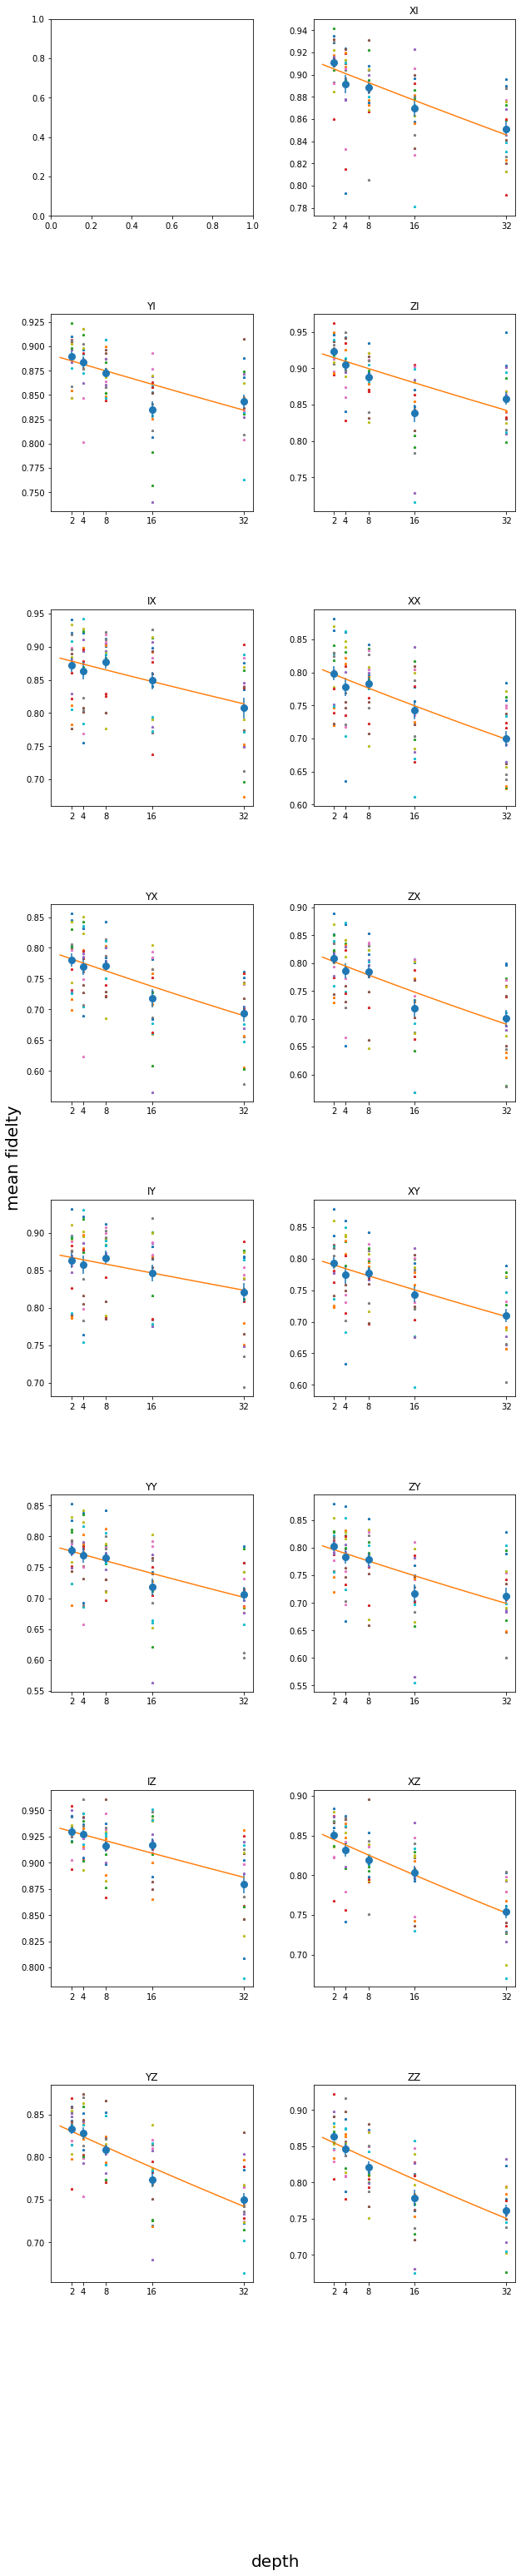

In [10]:
x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(8, 2)
fig.set_figwidth(10)
fig.set_figheight(50)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (8):
    for j in range(2):
        pauli_label=pauli_request_list[2*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
#             print ([tuple(eab_result['fidelity_list'][pauli_label][2])])
            axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=8)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

# data analysis with bootstrapping

full set of data with bootstrapping

In [12]:
import bootstrap

raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
# depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
alpha_detail={}
a_detail={}
alpha_error_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        fidelity_list[pauli_label] = alpha_bootstrap #avg pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err_bootstrap #error on pauli fidelity from fit
        a_BS_dic[pauli_label]=a_rtn_frm_fit
        Y_BS_dic[pauli_label]=Y_rtn_frm_fit
        Yerr_BS_dic[pauli_label]=Yerr_rtn_frm_fit 
        alpha_detail[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit


# pauli_label="IX"
# print (Y_BS_dic["IX"][0])    
# print (Yerr_BS_dic["IX"][0])  
# print (a_BS_dic["IX"][0])
# print (alpha_detail[pauli_label][0])


Method I: use the average of the 10 sets of Pauli fidelities from 10 times of resampling in bootstrapping


XI 0.0023073 0.0001785
YI 0.0020103 0.0002265
ZI 0.0026989 0.0001985
IX 0.0025342 0.0003527
XX 0.0041406 0.0004705
YX 0.0043956 0.0002545
ZX 0.0049589 0.0004394
IY 0.0019212 0.0002592
XY 0.0037645 0.0004586
YY 0.0033473 0.0002874
ZY 0.0042796 0.0002523
IZ 0.0015904 0.000138
XZ 0.0039064 0.0002139
YZ 0.0036043 0.0002622
ZZ 0.0042565 0.0003611
{'IX': [0.9977368010536288, 0.9975609294121084, 0.9979455977222204, 0.9978015504168114, 0.9976405539607632, 0.9976300477580234, 0.9977420744714611, 0.9973342156804806, 0.9979607487102775, 0.9975744131386605], 'IY': [0.9977932977463612, 0.9981775404893235, 0.9979172317699052, 0.9982678111659498, 0.9981953024671267, 0.9978373732960916, 0.9983211932653683, 0.9977397981469358, 0.9976453255768553, 0.9980018714147431], 'IZ': [0.9970781686608697, 0.9973498272078235, 0.9971678929964342, 0.9972704736782411, 0.9977504842353477, 0.9974280942333654, 0.9970001760174945, 0.9972273568931938, 0.9973646142157473, 0.9973738722781638], 'XI': [0.9975855835665323, 0.99

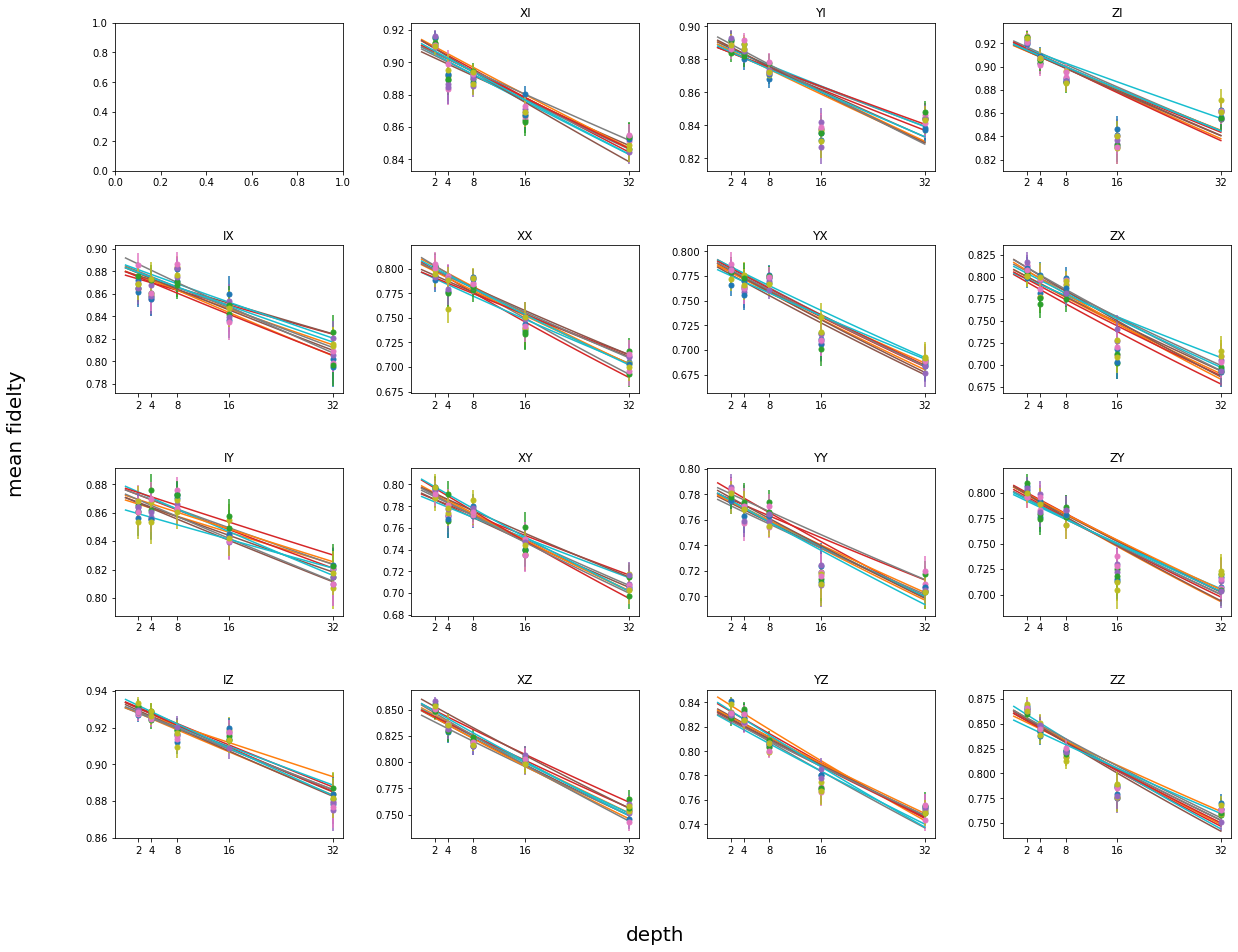

In [13]:
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        continue
    else:
        print (pauli_label[::-1],round(1-fidelity_list[pauli_label],7),round(stdev_list[pauli_label],7))


x_c=np.linspace(0,32,num=80)
# nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks(depth)   
            for m in range (10):
                axs[i, j].errorbar(depth,Y_BS_dic[pauli_label][m], yerr=Yerr_BS_dic[pauli_label][m], fmt='o',markersize=5)
                axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_BS_dic[pauli_label][m], alpha_detail[pauli_label][m]))
            axs[i, j].set_title(pauli_label[::-1])

print (alpha_detail)    

Method II: use the average of the 10 sets of Y from resampling as the a new set of Y and do the fit once with the new Y


Parameters: n = 2, C = 20,  L =  [2, 4, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.0031566842085231084
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0022857 5.25e-05
YI 0.002097 5.76e-05
ZI 0.003342 8.26e-05
IX 0.0026666 0.0001144
XX 0.0039938 0.0001451
YX 0.0043465 0.0001345
ZX 0.0051133 0.0001522
IY 0.0017305 0.0001188
XY 0.003737 7.61e-05
YY 0.0031852 9.11e-05
ZY 0.0046811 0.0001152
IZ 0.0015615 4.63e-05
XZ 0.0037892 7.79e-05
YZ 0.0035139 8.1e-05
ZZ 0.0044637 9.65e-05
{'IX': [0.9112533333333334, 0.8919466666666669, 0.8878866666666667, 0.8712199999999999, 0.8510999999999997], 'IY': [0.88778, 0.8845933333333333, 0.8719466666666668, 0.8368533333333333, 0.84228], 'IZ': [0.9226533333333334, 0.9044733333333334, 0.8875133333333333, 0.84052, 0.8577133333333334], 'XI': [0.8737733333333333, 0.8631999999999997, 0.8786066666666666, 0.8521599999999999, 0.8080666666666666], 'XX': [0.7966066666666667, 0.7788600000000001, 0.7848, 0.744760

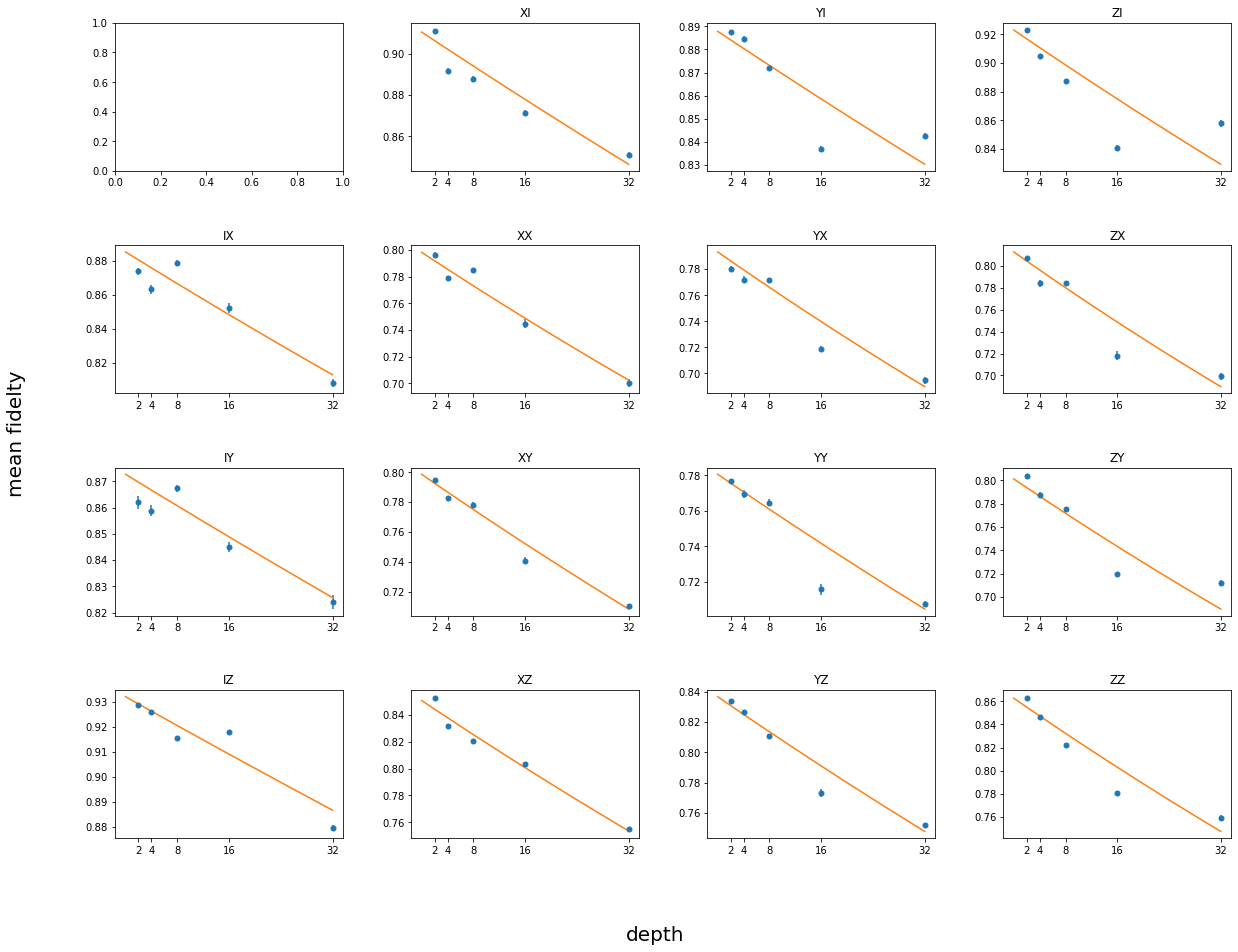

In [23]:
raw_fidelity_list_avg={}
for pauli_label in pauli_request_list:
    raw_fidelity_list_avg[pauli_label]={}
    raw_fidelity_list_avg[pauli_label][2]=[]
    raw_fidelity_list_avg[pauli_label][4]=[]
    raw_fidelity_list_avg[pauli_label][8]=[]
    raw_fidelity_list_avg[pauli_label][16]=[]
    raw_fidelity_list_avg[pauli_label][32]=[]
    if (pauli_label=="II"):
        raw_fidelity_list_avg[pauli_label][2]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][4]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][8]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][16]=[1.0]*10
        raw_fidelity_list_avg[pauli_label][32]=[1.0]*10
    else:
        for i in range (10):
            raw_fidelity_list_avg[pauli_label][2].append(Y_BS_dic[pauli_label][i][0])
            raw_fidelity_list_avg[pauli_label][4].append(Y_BS_dic[pauli_label][i][1])
            raw_fidelity_list_avg[pauli_label][8].append(Y_BS_dic[pauli_label][i][2])
            raw_fidelity_list_avg[pauli_label][16].append(Y_BS_dic[pauli_label][i][3])
            raw_fidelity_list_avg[pauli_label][32].append(Y_BS_dic[pauli_label][i][4])


raw_fidelity_list = raw_fidelity_list_avg
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8,16,32]
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

In [24]:
# print (raw_fidelity_list["XX"])
# print (np.mean(raw_fidelity_list["XX"][16])

In [25]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9968433
XI 0.0006861
YI 0.000769
ZI 0.0002118
IX 0.0001761
XX 5.79e-05
YX -6.59e-05
ZX -1.17e-05
IY 0.0005244
XY 7.9e-06
YY 0.0001101
ZY -1.79e-05
IZ 0.0005251
XZ 3.64e-05
YZ 6.95e-05
ZZ 7.8e-05


# Bootstrapping for different number of layers
Obtain the lists of:  
    alpha_detail[pauli_label]=alpha_rtn_frm_fit
    alpha_error_detail[pauli_label]=alpha_err_rtn_frm_fit
for different number of layers

plot alpha_detail vs. number of layers

In [27]:
# #####dpth=[2,4]
# raw_fidelity_list = eab_result["fidelity_list"]
# depth=[2,4]
# fidelity_list = {}
# stdev_list = {}
# a_detail={}
# Y_detail={}
# Y_err_detail={}
# a_BS_dic={}
# Y_BS_dic={}
# Yerr_BS_dic={}

# alpha_detail_d2={}
# alpha_error_detail_d2={}

# for pauli_label in pauli_request_list:
#     if(pauli_label == 'I'*nqubit):
#         alpha_detail_d2[pauli_label] = [1.0]*10
#         alpha_error_detail_d2[pauli_label] = [0.0]*10
#     else:
#         alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
#         alpha_detail_d2[pauli_label]=alpha_rtn_frm_fit
#         alpha_error_detail_d2[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_d2)



#####dpth=[2,8]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d28={}
alpha_error_detail_d28={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d28[pauli_label] = [1.0]*10
        alpha_error_detail_d28[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d28[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d28[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d28)
filename="EAB_Id_test_alpha_detail_d28"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d28, fp)


    #####dpth=[8,32]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d832={}
alpha_error_detail_d832={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d832[pauli_label] = [1.0]*10
        alpha_error_detail_d832[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d832[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d832[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_d2)
filename="EAB_Id_test_alpha_detail_d832"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d832, fp)


####dpth=[2,4,8]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d248={}
alpha_error_detail_d248={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d248[pauli_label] = [1.0]*10
        alpha_error_detail_d248[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d248[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d248[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_2)
filename="EAB_Id_test_alpha_detail_d248"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d248, fp)

#####dpth=[2,8,32]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,8,32]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d2832={}
alpha_error_detail_d2832={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d2832[pauli_label] = [1.0]*10
        alpha_error_detail_d2832[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d2832[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d2832[pauli_label]=alpha_err_rtn_frm_fit
# print (alpha_detail_2)
filename="EAB_Id_test_alpha_detail_d2832"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2832, fp)

####dpth=[2,4,8,16]
raw_fidelity_list = eab_result["fidelity_list"]
depth=[2,4,8,16]
fidelity_list = {}
stdev_list = {}
a_detail={}
Y_detail={}
Y_err_detail={}
a_BS_dic={}
Y_BS_dic={}
Yerr_BS_dic={}

alpha_detail_d24816={}
alpha_error_detail_d24816={}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        alpha_detail_d24816[pauli_label] = [1.0]*10
        alpha_error_detail_d24816[pauli_label] = [0.0]*10
    else:
        alpha_bootstrap,alpha_err_bootstrap, alpha_rtn_frm_fit,a_rtn_frm_fit, alpha_err_rtn_frm_fit,Y_rtn_frm_fit,Yerr_rtn_frm_fit = bootstrap.bootstrap_fit_EAB_plot_rs(depth, raw_fidelity_list[pauli_label],15)
        alpha_detail_d24816[pauli_label]=alpha_rtn_frm_fit
        alpha_error_detail_d24816[pauli_label]=alpha_err_rtn_frm_fit
# # print (alpha_detail_2)
filename="EAB_Id_test_alpha_detail_d24816"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d24816, fp)
    
####depth=[2,4,8,16,32]
alpha_detail_d2481632={}
alpha_error_detail_d2481632={}
alpha_detail_d2481632= alpha_detail
alpha_error_detail_d2481632=alpha_error_detail
alpha_detail_d2481632["II"] = [1.0]*10
alpha_error_detail_d2481632["II"] = [0.0]*10

filename="EAB_Id_test_alpha_detail_d2481632"
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/EAB_Id_test/"+filename, "wb") as fp:
    pickle.dump(alpha_detail_d2481632, fp)


In [28]:
CB_alpha_detail_d28={}
CB_alpha_detail_d2832={}
CB_alpha_detail_d832={}
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d2", "rb") as fp:   # Unpickling
    CB_alpha_detail_d28 = pickle.load(fp)
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d3", "rb") as fp:   # Unpickling
    CB_alpha_detail_d2832 = pickle.load(fp)
with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/CB_alpha_detail_d4", "rb") as fp:   # Unpickling
    CB_alpha_detail_d832 = pickle.load(fp)

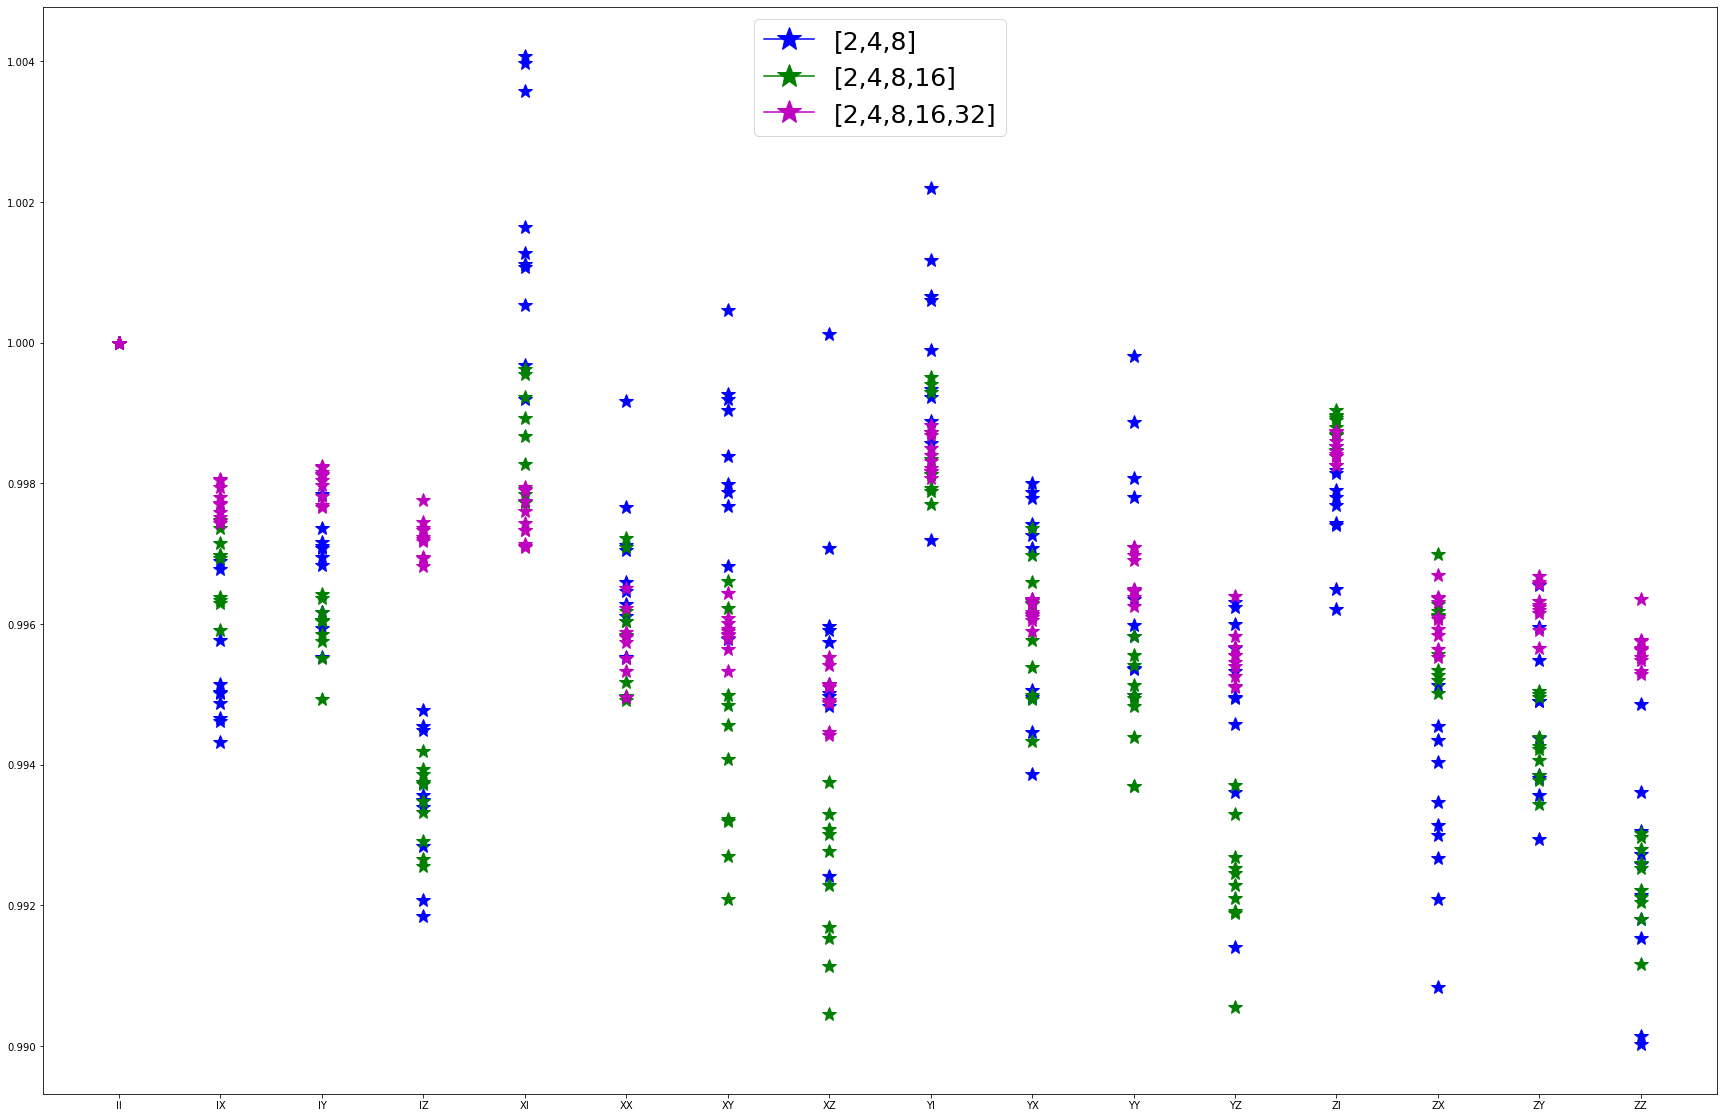

In [32]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d248[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d24816[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 3')
plt.plot(pauli_request_list,[tuple(alpha_detail_d2481632[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
legend_elements = [
# Line2D([0], [0], marker='*', color='r', label='[2,4]',markerfacecolor='r', markersize=25),
                   Line2D([0], [0], marker='*', color='b', label='[2,4,8]',markerfacecolor='b', markersize=25),
                   Line2D([0], [0], marker='*', color='g', label='[2,4,8,16]',markerfacecolor='g', markersize=25),
                   Line2D([0], [0], marker='*', color='m', label='[2,4,8,16,32]',markerfacecolor='m', markersize=25),
                  ]

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# # plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.legend()
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)  

# plt.figure(figsize=(30,20))
#  plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],"r*",markersize=15,label='depth 2')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],"b*",markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],"m*",markersize=15,label='depth 5')
# plt.legend()

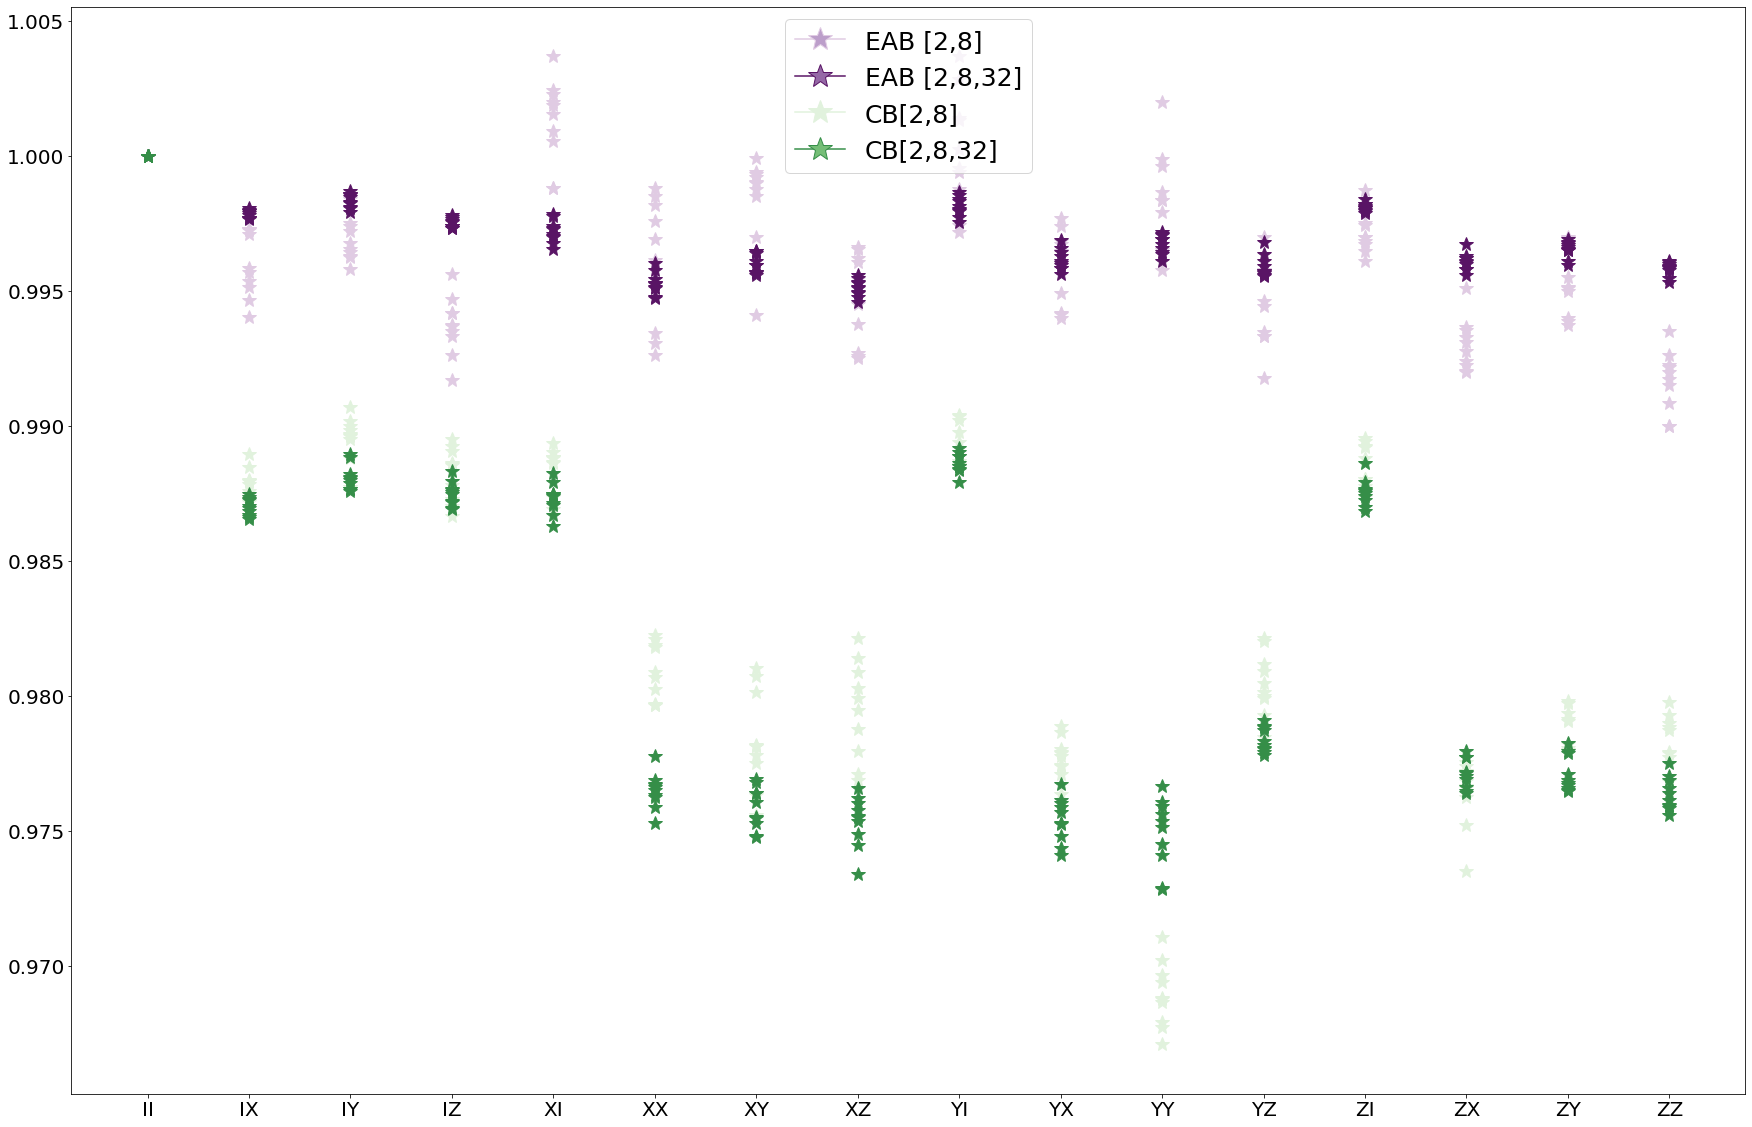

In [37]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=30)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
plt.rcParams.update({'font.size': 20})
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d28[pauli_label]) for pauli_label in pauli_request_list],color=pal[7],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(alpha_detail_d4[pauli_label]) for pauli_label in pauli_request_list],color=pal[3],marker="*",linestyle='None',markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",linestyle='None',markersize=15,label='depth 5')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d28[pauli_label]) for pauli_label in pauli_request_list],color=pal[11],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],color=pal[17],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

# plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d832[pauli_label]) for pauli_label in pauli_request_list],color=pal[18],marker="*",linestyle='None',markersize=15,label='depth 4')

legend_elements = [
# Line2D([0], [0], marker='*', color=pal[7], label='[2,4]',markerfacecolor=pal[7], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[7], label='EAB [2,8]',markerfacecolor=pal[5], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[0], label='EAB [2,8,32]',markerfacecolor=pal[3], markersize=25),
#                    Line2D([0], [0], marker='*', color=pal[0], label='[2,4,8,16,32]',markerfacecolor=pal[0], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[11], label='CB[2,8]',markerfacecolor=pal[11], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[17], label='CB[2,8,32]',markerfacecolor=pal[15], markersize=25),
#                    Line2D([0], [0], marker='*', color=pal[17], label='CB[8,32]',markerfacecolor=pal[17], markersize=25),
                  
                  ]


plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.leg

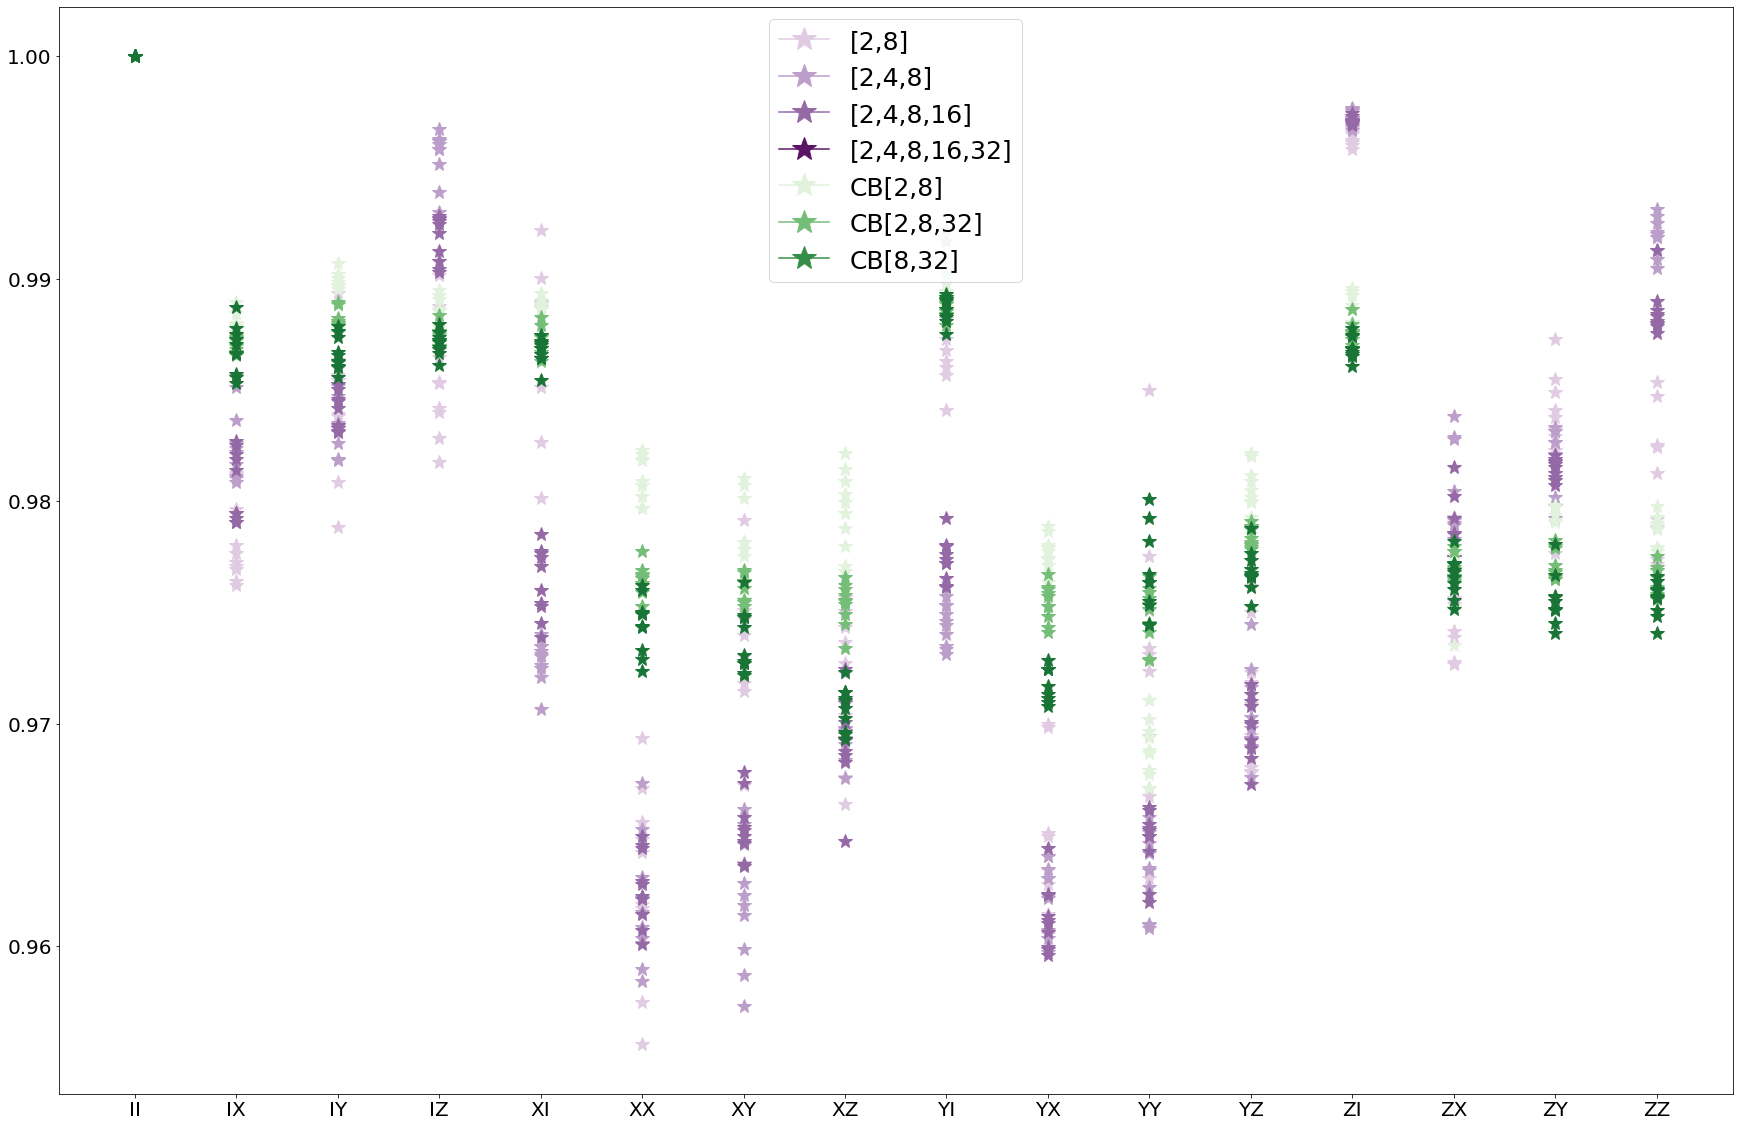

In [16]:
##plot  alpha_detail vs. depth
import seaborn as sns
pal = sns.color_palette("PRGn",20)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# fig, axs = plt.subplots(4, 4)
fig.set_figwidth(30)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=30)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
plt.rcParams.update({'font.size': 20})
# for i in range (4):
#     for j in range(4):
#         pauli_label=pauli_request_list[4*i+j]
#         if (pauli_label == 'I'*nqubit):
#             pass
#         else:
#             axs[i, j].set_xticks([2,4,8,16,32])   
#             axs[i, j].plot(depth,[tuple(eab_result['fidelity_list'][pauli_label][L]) for L in depth],"*",markersize=3)
# #             axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
# #             axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
#             axs[i, j].set_title(pauli_label[::-1])
plt.figure(figsize=(30,20))
plt.plot(pauli_request_list,[tuple(alpha_detail_d2[pauli_label]) for pauli_label in pauli_request_list],color=pal[7],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],color=pal[5],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.plot(pauli_request_list,[tuple(alpha_detail_d3[pauli_label]) for pauli_label in pauli_request_list],color=pal[3],marker="*",linestyle='None',markersize=15,label='depth 4')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d5[pauli_label]) for pauli_label in pauli_request_list],color=pal[0],marker="*",linestyle='None',markersize=15,label='depth 5')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d28[pauli_label]) for pauli_label in pauli_request_list],color=pal[11],marker="*",linestyle='None',markersize=15,label='depth 2')
plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],color=pal[15],marker="*",linestyle='None',markersize=15,label='depth 3')
# plt.plot(pauli_request_list,[tuple(alpha_detail_d2_2[pauli_label]) for pauli_label in pauli_request_list],"g*",markersize=15,label='depth 4')

plt.plot(pauli_request_list,[tuple(CB_alpha_detail_d832[pauli_label]) for pauli_label in pauli_request_list],color=pal[18],marker="*",linestyle='None',markersize=15,label='depth 4')

legend_elements = [Line2D([0], [0], marker='*', color=pal[7], label='[2,8]',markerfacecolor=pal[7], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[5], label='[2,4,8]',markerfacecolor=pal[5], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[3], label='[2,4,8,16]',markerfacecolor=pal[3], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[0], label='[2,4,8,16,32]',markerfacecolor=pal[0], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[11], label='CB[2,8]',markerfacecolor=pal[11], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[15], label='CB[2,8,32]',markerfacecolor=pal[15], markersize=25),
                   Line2D([0], [0], marker='*', color=pal[17], label='CB[8,32]',markerfacecolor=pal[17], markersize=25),
                  
                  ]


plt.legend(handles=legend_elements, loc='upper center',fontsize=25)
# plt.leg